## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa
- **Integrantes**:

 *   Danilo Frazão (1715080036);
 *   Rafael Aragão Morais (1915080022);
 *   Yasser Tuma (1815310044)
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import random

### Obtendo os dados

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data= pd.read_csv("/content/drive/My Drive/Colab Notebooks/RNA/covtype.csv")
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [15]:
train, test = train_test_split(data, test_size = 0.3)

### Funções

In [16]:
# Obtendo o atributo-alvo
def getTarget(data, column):
  return data[column]


train_y = getTarget(train, "Cover_Type") #train["Cover_Type"]
print("Atributo alvo do conjunto de treinamento:")
print(train_y)

test_y = getTarget(test, "Cover_Type") #test["Cover_Type"]
print("\nAtributo alvo do conjunto de teste")
print(test_y)

Atributo alvo do conjunto de treinamento:
237028    2
367821    6
217385    2
128333    2
300980    1
         ..
297323    6
511120    2
536743    1
99152     1
166382    1
Name: Cover_Type, Length: 406708, dtype: int64

Atributo alvo do conjunto de teste
273288    3
215751    1
143730    2
95016     1
117687    2
         ..
444778    2
248864    6
427183    2
192699    1
19307     2
Name: Cover_Type, Length: 174304, dtype: int64


In [17]:
# Excluindo os atributos categoricos e Obtendo os atributos preditores que serão utilizados
columns = data.head(0).columns
columnsToRemove = columns[10 :]

def getPredictors(data, columns):
  return data.drop(columns, axis=1)

train_x = getPredictors(train, columnsToRemove) #train.drop(columnsToRemove, axis=1)
print("Atributos preditores do conjunto de treinamento:")
print(train_x.head())

test_x = getPredictors(test, columnsToRemove) #test.drop(columnsToRemove, axis=1)
print("\nAtributos preditores do conjunto de teste:")
print(test_x.head())

Atributos preditores do conjunto de treinamento:
        Elevation  Aspect  ...  Hillshade_3pm  Horizontal_Distance_To_Fire_Points
237028       2805      97  ...            116                                 342
367821       2487     119  ...            133                                1129
217385       2923     348  ...            161                                2721
128333       2886     106  ...            122                                1981
300980       3060     129  ...             91                                3001

[5 rows x 10 columns]

Atributos preditores do conjunto de teste:
        Elevation  Aspect  ...  Hillshade_3pm  Horizontal_Distance_To_Fire_Points
273288       2247     298  ...            228                                 752
215751       3291     220  ...            165                                 778
143730       2896     334  ...            171                                2571
95016        3075      11  ...            150                   

In [24]:
# Padronização dos atributos preditores dos conjuntos de treinamento e de teste

def standardization(value, mean, std):
  if(std != 0):
    return (value - mean) / std
  else:
    return value

def applyStandardization(set):
  for column in set.head(0).columns:
    mean = set[column].mean()
    std = set[column].std()
    set[column] = set[column].apply(standardization, args=(mean, std))
  return set

train_x = applyStandardization(train_x)
print("Conjunto de treino apos o escalonamento:")
print(train_x.head())

test_x = applyStandardization(test_x)
print("\nConjunto de teste apos o escalonamento:")
print(test_x.head())


Conjunto de treino apos o escalonamento:
        Elevation    Aspect  ...  Hillshade_3pm  Horizontal_Distance_To_Fire_Points
237028  -0.550207 -0.523667  ...      -0.692760                           -1.235707
367821  -1.684849 -0.327086  ...      -0.248511                           -0.642107
217385  -0.129176  1.719139  ...       0.483194                            0.558669
128333  -0.261194 -0.443248  ...      -0.535966                            0.000519
300980   0.359648 -0.237732  ...      -1.346069                            0.769861

[5 rows x 10 columns]

Conjunto de teste apos o escalonamento:
        Elevation    Aspect  ...  Hillshade_3pm  Horizontal_Distance_To_Fire_Points
273288  -2.551604  1.270817  ...       2.230933                           -0.930187
215751   1.185893  0.573858  ...       0.585711                           -0.910496
143730  -0.228198  1.592491  ...       0.742398                            0.447398
95016    0.412618 -1.293636  ...       0.193991        

In [27]:
def testing(MLP, test_x, test_y):
  predictions = MLP.predict(test_x.values)

  print("\nMatriz de confusao:\n")
  print(confusion_matrix(test_y, predictions))

  print("\nAcuracia:\n")
  print(MLP.score(test_x, test_y))

  print("\nPrecisao:\n")
  print(precision_score(test_y, predictions, average='micro'))

  print("\nRevocacao:\n")
  print(recall_score(test_y, predictions, average='micro'))

  print("\nF-Score:\n")
  print(f1_score(test_y, predictions, average='micro'))


In [21]:
def testingMultiFit(MLP, test_x, test_y):
  predictions = MLP.predict(test_x.values)

  accuracy = MLP.score(test_x.values, test_y.values)

  FScore = f1_score(test_y, predictions, average='micro')

  return accuracy, FScore


In [22]:
def multiFit(MLP, numRepeat, data, columnsToRemove=data.head(0).columns[10:], target="Cover_Type"):
  accuracyTotal = []
  fScoreTotal = []
  for i in range(numRepeat):
    print(i)

    train, test = train_test_split(data, test_size = 0.3)

    train_y = getTarget(train, target)
    test_y = getTarget(test, target)
    
    train_x = getPredictors(train, columnsToRemove)
    test_x = getPredictors(test, columnsToRemove)
    
    train_x = applyStandardization(train_x)
    test_x = applyStandardization(test_x)
    
    MLP.fit(train_x.values, train_y.values)
    
    acc, fs = testingMultiFit(MLP, test_x, test_y)
    accuracyTotal.append(acc)
    fScoreTotal.append(fs)

  mean_acc = np.mean(accuracyTotal)
  std_acc = np.std(accuracyTotal)
  mean_fs = np.mean(fScoreTotal)
  std_fs = np.std(fScoreTotal)

  return mean_acc, std_acc, mean_fs, std_fs

### Treinamentos e testes

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=True, max_iter=300)
MLP.fit(train_x.values, train_y.values)

Iteration 1, loss = 0.90685639
Iteration 2, loss = 0.71050874
Iteration 3, loss = 0.68448132
Iteration 4, loss = 0.67408927
Iteration 5, loss = 0.66938757
Iteration 6, loss = 0.66587695
Iteration 7, loss = 0.66304336
Iteration 8, loss = 0.66073854
Iteration 9, loss = 0.65917213
Iteration 10, loss = 0.65807255
Iteration 11, loss = 0.65734031
Iteration 12, loss = 0.65654406
Iteration 13, loss = 0.65602097
Iteration 14, loss = 0.65550179
Iteration 15, loss = 0.65489893
Iteration 16, loss = 0.65432109
Iteration 17, loss = 0.65375384
Iteration 18, loss = 0.65315537
Iteration 19, loss = 0.65260444
Iteration 20, loss = 0.65207211
Iteration 21, loss = 0.65175322
Iteration 22, loss = 0.65124203
Iteration 23, loss = 0.65095190
Iteration 24, loss = 0.65059992
Iteration 25, loss = 0.65028246
Iteration 26, loss = 0.65003046
Iteration 27, loss = 0.64980535
Iteration 28, loss = 0.64962542
Iteration 29, loss = 0.64924965
Iteration 30, loss = 0.64913157
Iteration 31, loss = 0.64886221
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, verbose=True)

In [ ]:
testing(MLP, test_x, test_y)


Matriz de confusao:

[[44441 17985     5     0    19    12  1166]
 [14936 68435  1019     0   117   404    40]
 [    0  1907  8014   162     0   588     0]
 [    0    14   445   276     0    80     0]
 [    4  2484    40     0   342     9     0]
 [    0  1496  2691    53     0   904     0]
 [ 3190    26     0     0     0     0  3000]]

Acuracia:

0.719501560492014

Precisao:



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.719501560492014

Revocacao:

0.719501560492014

F-Score:

0.719501560492014


In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=False, max_iter=300)
mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.7188081359769903 
Desvio Padrao da acuracia:  0.00374348548893373

Media do F-Score:  0.7188081359769904 
Desvio Padrao do F-Score:  0.003743485488933737


In [26]:
new_MLP = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=False, max_iter=100)

new_mean_acc, new_std_acc, new_mean_fs, new_std_fs = multiFit(new_MLP, 15, data)

print("Media da acuracia: ", new_mean_acc, "\nDesvio Padrao da acuracia: ", new_std_acc)
print("\nMedia do F-Score: ", new_mean_fs, "\nDesvio Padrao do F-Score: ", new_std_fs)

0
1
2
3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5
6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10
11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12
13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14
Media da acuracia:  0.7187109876996512 
Desvio Padrao da acuracia:  0.004083501667656718

Media do F-Score:  0.7187109876996511 
Desvio Padrao do F-Score:  0.004083501667656719


In [ ]:
new2_MLP = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', verbose=False, max_iter=100)

new2_mean_acc, new2_std_acc, new2_mean_fs, new2_std_fs = multiFit(new2_MLP, 15, data)

print("Media da acuracia: ", new2_mean_acc, "\nDesvio Padrao da acuracia: ", new2_std_acc)
print("\nMedia do F-Score: ", new2_mean_fs, "\nDesvio Padrao do F-Score: ", new2_std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6
7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9
10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7125076494706567 
Desvio Padrao da acuracia:  0.0023550356746742875

Media do F-Score:  0.7125076494706566 
Desvio Padrao do F-Score:  0.0023550356746743027


### Houve influência da escolha do otimizador no desempenho da rede?


> Sim, o modelo com o otimizador adam apresentou uma acurácia e um F-Score um pouco maior que o modelo com o otimizador SGD, entretanto, essa diferença é extremamente pequena. Fora isso, o modelo com o otimizador adam concluiu a sua execução mais rapidamente e alcançou o limite de épocas um número menor de vezes que o modelo com o otimizador SGD. 



## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
# função de ativação = relu, solver = adam, epocas = 100, camada oculta = (5,5,)
MLP_01 = MLPClassifier(hidden_layer_sizes=(5, 5,), activation='relu', solver='adam', verbose=False, max_iter=100)

mean_acc_01, std_acc_01, mean_fs_01, std_fs_01 = multiFit(MLP_01, 15, data)

print("Media da acuracia: ", mean_acc_01, "\nDesvio Padrao da acuracia: ", std_acc_01)
print("\nMedia do F-Score: ", mean_fs_01, "\nDesvio Padrao do F-Score: ", std_fs_01)

0
1
2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3
4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5
6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7
8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11
12
13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14
Media da acuracia:  0.7091510617465272 
Desvio Padrao da acuracia:  0.003670213828882683

Media do F-Score:  0.7091510617465272 
Desvio Padrao do F-Score:  0.0036702138288826837


In [ ]:
# função de ativação = relu, solver = sgd, epocas = 100, camada oculta = (10,10,)
MLP_02 = MLPClassifier(hidden_layer_sizes=(10, 10,), activation='relu', solver='sgd', verbose=False, max_iter=100)

mean_acc_02, std_acc_02, mean_fs_02, std_fs_02 = multiFit(MLP_02, 15, data)

print("Media da acuracia: ", mean_acc_02, "\nDesvio Padrao da acuracia: ", std_acc_02)
print("\nMedia do F-Score: ", mean_fs_02, "\nDesvio Padrao do F-Score: ", std_fs_02)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7251805275074964 
Desvio Padrao da acuracia:  0.0038860025431836326

Media do F-Score:  0.7251805275074964 
Desvio Padrao do F-Score:  0.0038860025431836365


In [ ]:
# função de ativação = sigmoide, solver = sgd, epocas = 200, camada oculta = (10,10,)
MLP_03 = MLPClassifier(hidden_layer_sizes=(10, 10,), activation='logistic', solver='sgd', verbose=False, max_iter=200)

mean_acc_03, std_acc_03, mean_fs_03, std_fs_03 = multiFit(MLP_03, 15, data)

print("Media da acuracia: ", mean_acc_03, "\nDesvio Padrao da acuracia: ", std_acc_03)
print("\nMedia do F-Score: ", mean_fs_03, "\nDesvio Padrao do F-Score: ", std_fs_03)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.714865981274096 
Desvio Padrao da acuracia:  0.0021474020695224335

Media do F-Score:  0.714865981274096 
Desvio Padrao do F-Score:  0.0021474020695224365


In [ ]:
# função de ativação = sigmoide, solver = adam, epocas = 100, camada oculta = (10,10,)
MLP_04 = MLPClassifier(hidden_layer_sizes=(10, 10,), activation='logistic', solver='adam', verbose=False, max_iter=100)

mean_acc_04, std_acc_04, mean_fs_04, std_fs_04 = multiFit(MLP_04, 15, data)

print("Media da acuracia: ", mean_acc_04, "\nDesvio Padrao da acuracia: ", std_acc_04)
print("\nMedia do F-Score: ", mean_fs_04, "\nDesvio Padrao do F-Score: ", std_fs_04)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7310117189890458 
Desvio Padrao da acuracia:  0.002731489676407791

Media do F-Score:  0.7310117189890459 
Desvio Padrao do F-Score:  0.0027314896764077997


In [ ]:
# função de ativação = identity, solver = adam, epocas = 200, camada oculta = (10,10,)
MLP_05 = MLPClassifier(hidden_layer_sizes=(10, 10,), activation='identity', solver='adam', verbose=False, max_iter=200)

mean_acc_05, std_acc_05, mean_fs_05, std_fs_05 = multiFit(MLP_05, 15, data)

print("Media da acuracia: ", mean_acc_05, "\nDesvio Padrao da acuracia: ", std_acc_05)
print("\nMedia do F-Score: ", mean_fs_05, "\nDesvio Padrao do F-Score: ", std_fs_05)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6968706015543724 
Desvio Padrao da acuracia:  0.0014301631060102972

Media do F-Score:  0.6968706015543724 
Desvio Padrao do F-Score:  0.0014301631060102972


In [ ]:
# função de ativação = sigmoide, solver = adam, epocas = 200, camada oculta = (30,)
MLP_06 = MLPClassifier(hidden_layer_sizes=(30,), activation='logistic', solver='adam', verbose=False, max_iter=200)

mean_acc_06, std_acc_06, mean_fs_06, std_fs_06 = multiFit(MLP_06, 15, data)

print("Media da acuracia: ", mean_acc_06, "\nDesvio Padrao da acuracia: ", std_acc_06)
print("\nMedia do F-Score: ", mean_fs_06, "\nDesvio Padrao do F-Score: ", std_fs_06)

0
1
2
3
4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5
6
7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10
11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13
14
Media da acuracia:  0.7546615874181507 
Desvio Padrao da acuracia:  0.0023174666298440387

Media do F-Score:  0.7546615874181507 
Desvio Padrao do F-Score:  0.0023174666298440426


In [ ]:
# função de ativação = hiperbolica, solver = adam, epocas = 150, camada oculta = (15, 15,)
MLP_07 = MLPClassifier(hidden_layer_sizes=(15,15), activation='tanh', solver='adam', verbose=False, max_iter=200)

mean_acc_07, std_acc_07, mean_fs_07, std_fs_07 = multiFit(MLP_07, 15, data)

print("Media da acuracia: ", mean_acc_07, "\nDesvio Padrao da acuracia: ", std_acc_07)
print("\nMedia do F-Score: ", mean_fs_07, "\nDesvio Padrao do F-Score: ", std_fs_07)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1
2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3
4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11
12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7643515543724374 
Desvio Padrao da acuracia:  0.0011703350123233147

Media do F-Score:  0.7643515543724374 
Desvio Padrao do F-Score:  0.0011703350123233485


In [ ]:
# função de ativação = identity, solver = adam, epocas = 200, camada oculta = (20,20,)
MLP_08 = MLPClassifier(hidden_layer_sizes=(20, 20,), activation='identity', solver='adam', verbose=False, max_iter=200)

mean_acc_08, std_acc_08, mean_fs_08, std_fs_08 = multiFit(MLP_08, 15, data)

print("Media da acuracia: ", mean_acc_08, "\nDesvio Padrao da acuracia: ", std_acc_08)
print("\nMedia do F-Score: ", mean_fs_08, "\nDesvio Padrao do F-Score: ", std_fs_08)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6972859678110274 
Desvio Padrao da acuracia:  0.0015081336371791671

Media do F-Score:  0.6972859678110274 
Desvio Padrao do F-Score:  0.0015081336371791671


In [ ]:
# função de ativação = hiperbolica, solver = sgd, epocas = 150, camada oculta = (20,20,)
MLP_09 = MLPClassifier(hidden_layer_sizes=(20, 20,), activation='tanh', solver='sgd', verbose=False, max_iter=200)

mean_acc_09, std_acc_09, mean_fs_09, std_fs_09 = multiFit(MLP_09, 15, data)

print("Media da acuracia: ", mean_acc_09, "\nDesvio Padrao da acuracia: ", std_acc_09)
print("\nMedia do F-Score: ", mean_fs_09, "\nDesvio Padrao do F-Score: ", std_fs_09)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7673899241172512 
Desvio Padrao da acuracia:  0.0021144389859913734

Media do F-Score:  0.7673899241172512 
Desvio Padrao do F-Score:  0.0021144389859913946


In [ ]:
# função de ativação = sigmoide, solver = adam, epocas = 150, camada oculta = (10,15,)
MLP_10 = MLPClassifier(hidden_layer_sizes=(10, 15,), activation='identity', solver='sgd', verbose=False, max_iter=150)

mean_acc_10, std_acc_10, mean_fs_10, std_fs_10 = multiFit(MLP_10, 15, data)

print("Media da acuracia: ", mean_acc_10, "\nDesvio Padrao da acuracia: ", std_acc_10)
print("\nMedia do F-Score: ", mean_fs_10, "\nDesvio Padrao do F-Score: ", std_fs_10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6965680649899028 
Desvio Padrao da acuracia:  0.0013215854770626822

Media do F-Score:  0.6965680649899028 
Desvio Padrao do F-Score:  0.0013215854770626822


### Top-3 melhores redes no tocante à F-Score e Acurácia - Arquiteturas próprias:



1.   O modelo n°9:

> Apresenta a função tangente hiperbólica como função de ativação, utiliza o otimizador SGD, realizou cada treinamento por 150 épocas e apresenta duas camadas ocultas, cada uma com 20 neurônios. 

> Este modelo apresenta, em média, uma acurácia de 0.7673, com um desvio padrão de 0.002114. O F-Score deste modelo é, em média, de 0.7673, com um desvio padrão de 0.002114. 

2.   O modelo n°7:

> Apresenta a função tangente hiperbólica como função de ativação, utiliza o otimizador adam, realizou cada treinamento por 150 épocas e apresenta duas camadas ocultas, cada uma com 15 neurônios. 

> Este modelo apresenta, em média, uma acurácia de 0.7643, com um desvio padrão de 0.001170. O F-Score deste modelo é, em média, de 0.7643, com um desvio padrão de 0.001170. 

3.   O modelo n°6

> Apresenta a função sigmoide como função de ativação, utiliza o otimizador adam, realizou cada treinamento por 200 épocas e apresenta uma camada oculta, com 30 neurônios. 

> Este modelo apresenta, em média, uma acurácia de 0.7546, com um desvio padrão de 0.002317. O F-Score deste modelo é, em média, de 0.7546, com um desvio padrão de 0.002317. 


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [ ]:
print("Numero de neuronio na camada de entrada: ",MLP.n_features_in_)
print("Numero de neuronio na camada de saida: ", MLP.n_outputs_)

Nh_0_5 = 0.5 * np.sqrt(MLP.n_features_in_ * MLP.n_outputs_)
print("O valor de Nh para 0.5: ", Nh_0_5)

Nh_2 = 2 * np.sqrt(MLP.n_features_in_ * MLP.n_outputs_)
print("O valor de Nh para 2: ", Nh_2)

Nh_3 = 3 * np.sqrt(MLP.n_features_in_ * MLP.n_outputs_)
print("O valor de Nh para 3: ", Nh_3)

Numero de neuronio na camada de entrada:  10
Numero de neuronio na camada de saida:  7
O valor de Nh para 0.5:  4.183300132670378
O valor de Nh para 2:  16.73320053068151
O valor de Nh para 3:  25.099800796022265


In [ ]:
#1 - (4, 0)
MLP = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', solver='adam', verbose=False, max_iter=300)
mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.7016289547763296 
Desvio Padrao da acuracia:  0.0027563433264444124

Media do F-Score:  0.7016289547763296 
Desvio Padrao do F-Score:  0.0027563433264444124


In [ ]:
#2 - (3, 1)
MLP = MLPClassifier(hidden_layer_sizes=(3, 1,), activation='relu', solver='adam', verbose=False, max_iter=300)
mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6936348754666176 
Desvio Padrao da acuracia:  0.013880831500187889

Media do F-Score:  0.6936348754666176 
Desvio Padrao do F-Score:  0.013880831500187889


In [ ]:
#3 - (2, 2)
MLP = MLPClassifier(hidden_layer_sizes=(2, 2,), activation='relu', solver='sgd', verbose=False, max_iter=100)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1
2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6
7
8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10
11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.6816680435713849 
Desvio Padrao da acuracia:  0.05195497396788402

Media do F-Score:  0.6816680435713849 
Desvio Padrao do F-Score:  0.05195497396788402


In [ ]:
#4 - (1, 3)
MLP = MLPClassifier(hidden_layer_sizes=(1, 3,), activation='tanh', solver='sgd', verbose=False, max_iter=200)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6936203414723701 
Desvio Padrao da acuracia:  0.001146008785067666

Media do F-Score:  0.6936203414723701 
Desvio Padrao do F-Score:  0.001146008785067666


In [ ]:
#5 - (16, 0)
MLP = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', verbose=False, max_iter=300)
mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.7295640566672786 
Desvio Padrao da acuracia:  0.0021022094695531852

Media do F-Score:  0.7295640566672785 
Desvio Padrao do F-Score:  0.002102209469553192


In [ ]:
#6 - (14, 2)
MLP = MLPClassifier(hidden_layer_sizes=(14, 2,), activation='tanh', solver='sgd', verbose=False, max_iter=200)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2
3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10
11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7276685178385656 
Desvio Padrao da acuracia:  0.0036239530921979733

Media do F-Score:  0.7276685178385656 
Desvio Padrao do F-Score:  0.003623953092197974


In [ ]:
#7 - (12, 4)
MLP = MLPClassifier(hidden_layer_sizes=(12, 4,), activation='logistic', solver='adam', verbose=False, max_iter=200)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7
8
9
10
11
12
13
14
Media da acuracia:  0.7291180925279972 
Desvio Padrao da acuracia:  0.0020955412474385694

Media do F-Score:  0.7291180925279972 
Desvio Padrao do F-Score:  0.0020955412474385803


In [ ]:
#8 - (10, 6)
MLP = MLPClassifier(hidden_layer_sizes=(10, 6), activation='relu', solver='sgd', verbose=False, max_iter=200)
mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6
7
8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9
10
11
12
13
14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7219107612753198 
Desvio Padrao da acuracia:  0.004004196757143837

Media do F-Score:  0.7219107612753198 
Desvio Padrao do F-Score:  0.004004196757143824


In [ ]:
#9 - (8, 8)
MLP = MLPClassifier(hidden_layer_sizes=(8, 8), activation='relu', solver='adam', verbose=False, max_iter=200)
mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7
8
9
10
11
12
13
14
Media da acuracia:  0.7246060522611835 
Desvio Padrao da acuracia:  0.002640751773489966

Media do F-Score:  0.7246060522611835 
Desvio Padrao do F-Score:  0.002640751773489967


In [ ]:
#10 - (6, 10)
MLP = MLPClassifier(hidden_layer_sizes=(6, 10,), activation='logistic', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7072230126675233 
Desvio Padrao da acuracia:  0.002227931342697462

Media do F-Score:  0.7072230126675234 
Desvio Padrao do F-Score:  0.002227931342697466


In [ ]:
#11 - (4, 12)
MLP = MLPClassifier(hidden_layer_sizes=(4, 12,), activation='identity', solver='adam', verbose=False, max_iter=100)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6948828866042469 
Desvio Padrao da acuracia:  0.001380083335272993

Media do F-Score:  0.6948828866042469 
Desvio Padrao do F-Score:  0.001380083335272993


In [ ]:
#12 - (2, 14)
MLP = MLPClassifier(hidden_layer_sizes=(2, 14,), activation='tanh', solver='adam', verbose=False, max_iter=100)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2
3
4
5
6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7
8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9
10
11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13
14
Media da acuracia:  0.697130683556698 
Desvio Padrao da acuracia:  0.004002667113385716

Media do F-Score:  0.697130683556698 
Desvio Padrao do F-Score:  0.004002667113385716


In [ ]:
#13 - (25, 0)
MLP = MLPClassifier(hidden_layer_sizes=(25,), activation='tanh', solver='adam', verbose=False, max_iter=100)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7477066886971421 
Desvio Padrao da acuracia:  0.003009733636530047

Media do F-Score:  0.7477066886971423 
Desvio Padrao do F-Score:  0.003009733636530034


In [ ]:
#14 - (25, 0)
MLP = MLPClassifier(hidden_layer_sizes=(25,), activation='tanh', solver='adam', verbose=False, max_iter=200)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3
4
5
6
7
8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9
10
11
12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14
Media da acuracia:  0.7495842512698122 
Desvio Padrao da acuracia:  0.0018533818931228553

Media do F-Score:  0.7495842512698122 
Desvio Padrao do F-Score:  0.0018533818931228236


In [ ]:
#15 - (25, 1)
MLP = MLPClassifier(hidden_layer_sizes=(25, 1,), activation='identity', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6954516247475676 
Desvio Padrao da acuracia:  0.001127940322377361

Media do F-Score:  0.6954516247475676 
Desvio Padrao do F-Score:  0.001127940322377361


In [ ]:
#16 - (22, 3)
MLP = MLPClassifier(hidden_layer_sizes=(22, 3,), activation='tanh', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7387460987699651 
Desvio Padrao da acuracia:  0.0039055320650133872

Media do F-Score:  0.7387460987699651 
Desvio Padrao do F-Score:  0.0039055320650134067


In [ ]:
#17 - (22, 3)
MLP = MLPClassifier(hidden_layer_sizes=(22, 3,), activation='tanh', solver='sgd', verbose=False, max_iter=200)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7416127378985373 
Desvio Padrao da acuracia:  0.004282871675301579

Media do F-Score:  0.7416127378985373 
Desvio Padrao do F-Score:  0.004282871675301594


In [ ]:
#18 - (20, 5)
MLP = MLPClassifier(hidden_layer_sizes=(20, 5,), activation='identity', solver='adam', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6968457407747385 
Desvio Padrao da acuracia:  0.0014542471616090537

Media do F-Score:  0.6968457407747385 
Desvio Padrao do F-Score:  0.0014542471616090537


In [ ]:
#19 - (18, 7)
MLP = MLPClassifier(hidden_layer_sizes=(18, 7,), activation='identity', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6968591273483874 
Desvio Padrao da acuracia:  0.0010053300622455093

Media do F-Score:  0.6968591273483874 
Desvio Padrao do F-Score:  0.0010053300622455093


In [ ]:
#20 - (15, 9)
MLP = MLPClassifier(hidden_layer_sizes=(15, 9,), activation='logistic', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7139476623217674 
Desvio Padrao da acuracia:  0.0014440087521962123

Media do F-Score:  0.7139476623217674 
Desvio Padrao do F-Score:  0.001444008752196214


In [ ]:
#21 - (12, 13)\
MLP = MLPClassifier(hidden_layer_sizes=(12, 13,), activation='logistic', solver='adam', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7418368673887766 
Desvio Padrao da acuracia:  0.002513045716412688

Media do F-Score:  0.7418368673887766 
Desvio Padrao do F-Score:  0.002513045716412647


In [ ]:
#22 - (10, 15)
MLP = MLPClassifier(hidden_layer_sizes=(10, 15,), activation='tanh', solver='adam', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.749071736735818 
Desvio Padrao da acuracia:  0.002862013846222096

Media do F-Score:  0.749071736735818 
Desvio Padrao do F-Score:  0.002862013846222098


In [ ]:
#23 - (8, 17)
MLP = MLPClassifier(hidden_layer_sizes=(8, 17,), activation='relu', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7323266629949207 
Desvio Padrao da acuracia:  0.0044218687311999945

Media do F-Score:  0.7323266629949207 
Desvio Padrao do F-Score:  0.004421868731199978


In [ ]:
#24 - (6, 19)
MLP = MLPClassifier(hidden_layer_sizes=(6, 19,), activation='logistic', solver='adam', verbose=False, max_iter=200)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7283982773392083 
Desvio Padrao da acuracia:  0.0024289961505754966

Media do F-Score:  0.7283982773392083 
Desvio Padrao do F-Score:  0.002428996150575478


In [ ]:
#25 - (4, 21)
MLP = MLPClassifier(hidden_layer_sizes=(4, 21,), activation='relu', solver='sgd', verbose=False, max_iter=200)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3
4
5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6
7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9
10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12
13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7150510984639862 
Desvio Padrao da acuracia:  0.0040737452227574055

Media do F-Score:  0.7150510984639862 
Desvio Padrao do F-Score:  0.004073745222757411


In [ ]:
#26 - (2, 23)
MLP = MLPClassifier(hidden_layer_sizes=(2, 23,), activation='identity', solver='sgd', verbose=False, max_iter=100)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10
11
12
13
14
Media da acuracia:  0.6931736123860229 
Desvio Padrao da acuracia:  0.0009645603353433649

Media do F-Score:  0.6931736123860229 
Desvio Padrao do F-Score:  0.0009645603353433649


In [ ]:
#27 - (1, 24)
MLP = MLPClassifier(hidden_layer_sizes=(1, 24,), activation='identity', solver='adam', verbose=False, max_iter=100)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.6950500275380944 
Desvio Padrao da acuracia:  0.0011764446937271883

Media do F-Score:  0.6950500275380944 
Desvio Padrao do F-Score:  0.0011764446937271883


In [ ]:
#28 - (25, 0)
MLP = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver='adam', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2
3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4
5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13
14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7473066213818005 
Desvio Padrao da acuracia:  0.0026598914434206758

Media do F-Score:  0.7473066213818005 
Desvio Padrao do F-Score:  0.0026598914434206645


In [ ]:
#29 - (25, 0)
MLP = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7175440609509821 
Desvio Padrao da acuracia:  0.0018979763405871292

Media do F-Score:  0.717544060950982 
Desvio Padrao do F-Score:  0.0018979763405871655


In [ ]:
#30 - (5, 20)
MLP = MLPClassifier(hidden_layer_sizes=(5, 20,), activation='relu', solver='sgd', verbose=False, max_iter=150)

mean_acc, std_acc, mean_fs, std_fs = multiFit(MLP, 15, data)

print("Media da acuracia: ", mean_acc, "\nDesvio Padrao da acuracia: ", std_acc)
print("\nMedia do F-Score: ", mean_fs, "\nDesvio Padrao do F-Score: ", std_fs)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.7222507802460071 
Desvio Padrao da acuracia:  0.003844306073392424

Media do F-Score:  0.722250780246007 
Desvio Padrao do F-Score:  0.0038443060733924055


## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [ ]:
def multiFit_TOP6(MLP, numRepeat, data):
  accuracyTotal = []
  fScoreTotal = []
  for i in range(numRepeat):
    print(i)

    train, test = train_test_split(data, test_size = 0.3)

    train_y = getTarget(train, "Cover_Type")
    test_y = getTarget(test, "Cover_Type")
    
    train_x = getPredictors(train, "Cover_Type")
    test_x = getPredictors(test, "Cover_Type")
    
    train_x = applyStandardization(train_x)
    test_x = applyStandardization(test_x)
    
    MLP.fit(train_x.values, train_y.values)
    
    acc, fs = testingMultiFit(MLP, test_x, test_y)
    accuracyTotal.append(acc)
    fScoreTotal.append(fs)

  mean_acc = np.mean(accuracyTotal)
  std_acc = np.std(accuracyTotal)
  mean_fs = np.mean(fScoreTotal)
  std_fs = np.std(fScoreTotal)

  return mean_acc, std_acc, mean_fs, std_fs

### Arquiteturas próprias

In [ ]:
# função de ativação = hiperbolica, solver = sgd, epocas = 150, camada oculta = (20,20,)
MLP_1 = MLPClassifier(hidden_layer_sizes=(20, 20,), activation='tanh', solver='sgd', verbose=False, max_iter=200)

mean_acc_1, std_acc_1, mean_fs_1, std_fs_1 = multiFit_TOP6(MLP_1, 15, data)

print("Media da acuracia: ", mean_acc_1, "\nDesvio Padrao da acuracia: ", std_acc_1)
print("\nMedia do F-Score: ", mean_fs_1, "\nDesvio Padrao do F-Score: ", std_fs_1)

0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Media da acuracia:  0.8277541919099197 
Desvio Padrao da acuracia:  0.002017081286527794

Media do F-Score:  0.8277541919099197 
Desvio Padrao do F-Score:  0.0020170812865277824


In [ ]:
# função de ativação = hiperbolica, solver = adam, epocas = 150, camada oculta = (15, 15,)
MLP_07 = MLPClassifier(hidden_layer_sizes=(15,15), activation='tanh', solver='adam', verbose=False, max_iter=200)

mean_acc_07, std_acc_07, mean_fs_07, std_fs_07 = multiFit_TOP6(MLP_07, 15, data)

print("Media da acuracia: ", mean_acc_07, "\nDesvio Padrao da acuracia: ", std_acc_07)
print("\nMedia do F-Score: ", mean_fs_07, "\nDesvio Padrao do F-Score: ", std_fs_07)

0
1
2
3
4
5


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


6
7
8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11
12
13
14
Media da acuracia:  0.81312266691145 
Desvio Padrao da acuracia:  0.002324098337260821

Media do F-Score:  0.81312266691145 
Desvio Padrao do F-Score:  0.0023240983372608396


In [ ]:
# função de ativação = sigmoide, solver = adam, epocas = 200, camada oculta = (30,)
MLP_3 = MLPClassifier(hidden_layer_sizes=(30,), activation='logistic', solver='adam', verbose=False, max_iter=200)

mean_acc_3, std_acc_3, mean_fs_3, std_fs_3 = multiFit_TOP6(MLP_3, 15, data)

print("Media da acuracia: ", mean_acc_3, "\nDesvio Padrao da acuracia: ", std_acc_3)
print("\nMedia do F-Score: ", mean_fs_3, "\nDesvio Padrao do F-Score: ", std_fs_3)

0
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3
4
5
6
7
8


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


9
10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11
12


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


13


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


14
Media da acuracia:  0.8267345174713909 
Desvio Padrao da acuracia:  0.002057351975044798

Media do F-Score:  0.826734517471391 
Desvio Padrao do F-Score:  0.002057351975044778


### Arquiteturas pela regra da pirâmide geométrica

In [ ]:
#função de ativação = tangente hiperbolica, solver = adam, epocas = 200, camada oculta = (10, 15,)
MLP_4 = MLPClassifier(hidden_layer_sizes=(10, 15,), activation='tanh', solver='adam', verbose=False, max_iter=200)

mean_acc_4, std_acc_4, mean_fs_4, std_fs_4 = multiFit_TOP6(MLP_4, 15, data)

print("Media da acuracia: ", mean_acc_4, "\nDesvio Padrao da acuracia: ", std_acc_4)
print("\nMedia do F-Score: ", mean_fs_4, "\nDesvio Padrao do F-Score: ", std_fs_4)

0
1
2
3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


4
5
6
7
8
9
10
11
12
13
14
Media da acuracia:  0.7922694449544091 
Desvio Padrao da acuracia:  0.003120350819983893

Media do F-Score:  0.7922694449544093 
Desvio Padrao do F-Score:  0.003120350819983871


In [ ]:
#função de ativação = tangente hiperbolica, solver = adam, epocas = 200, camada oculta = (25,)
MLP_5 = MLPClassifier(hidden_layer_sizes=(25,), activation='tanh', solver='adam', verbose=False, max_iter=200)

mean_acc_5, std_acc_5, mean_fs_5, std_fs_5 = multiFit_TOP6(MLP_5, 15, data)

print("Media da acuracia: ", mean_acc_5, "\nDesvio Padrao da acuracia: ", std_acc_5)
print("\nMedia do F-Score: ", mean_fs_5, "\nDesvio Padrao do F-Score: ", std_fs_5)

0
1
2
3
4
5
6
7


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


8
9
10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


11
12
13
14
Media da acuracia:  0.8146919558166575 
Desvio Padrao da acuracia:  0.0029557544718835384

Media do F-Score:  0.8146919558166577 
Desvio Padrao do F-Score:  0.0029557544718835566


In [ ]:
#função de ativação = sigmoide, solver = adam, epocas = 200, camada oculta = (25,)
MLP_6 = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver='adam', verbose=False, max_iter=200)

mean_acc_6, std_acc_6, mean_fs_6, std_fs_6 = multiFit_TOP6(MLP_6, 15, data)

print("Media da acuracia: ", mean_acc_6, "\nDesvio Padrao da acuracia: ", std_acc_6)
print("\nMedia do F-Score: ", mean_fs_6, "\nDesvio Padrao do F-Score: ", std_fs_6)

0
1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


3
4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


5
6


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


7
8
9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


10
11


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


12
13
14
Media da acuracia:  0.8164413897558288 
Desvio Padrao da acuracia:  0.0024208426518074577

Media do F-Score:  0.8164413897558288 
Desvio Padrao do F-Score:  0.0024208426518074646


### Gráfico comparativo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


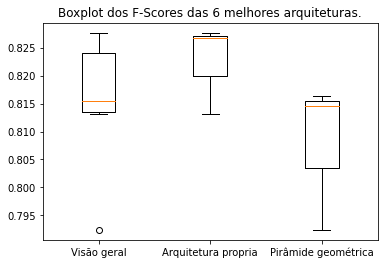

In [12]:
FScores = np.array([mean_fs_1, mean_fs_2, mean_fs_3, mean_fs_4, mean_fs_5, mean_fs_6])

arqP = FScores[:3]
arqPG = FScores[3:]


figura, ax = plt.subplots()
ax.set_title('Boxplot dos F-Scores das 6 melhores arquiteturas.')
ax.boxplot(np.array([FScores, arqP, arqPG]), labels=["Visão geral", "Arquitetura propria", "Pirâmide geométrica"])
figura.show()

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

---


1.   **É possível identificar uma rede com desempenho superior às demais?**

> Sim, as redes com as funções tangente hiperbólica ou sigmoide como suas funções de ativação apresentaram na maioria das vezes um desempenho melhor do que as redes que utilizaram as funções relu ou a linear. 

> Além disso, as redes com melhor desempenho utilizaram o otimizador adam, e tiveram entre 20 e 30 neurônios em suas camadas ocultas, distribuídos em uma ou duas camadas. 

2.   **Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?**

> A estratégia da pirâmide geométrica, pois foi possível observar com facilidade que as redes apresentam um melhor desempenho com 20 a 30 neurônios em suas camadas ocultas, podendo ser distribuídos entre duas camadas. 

3.   **Considerar os atributos categóricos trouxe melhorias? Justifique.**

> Sim, houve um aumento da acurácia e do F-Score das redes quando se utilizou também os atributos categóricos para o treinamento e predição. A adição mais atributos possibilitou que a rede pudesse diferenciar melhor os exemplos do dataset, e assim classifica-los corretamente.

4.   **Um número maior de épocas trouxe melhorias?**

> Sim, um número maior de épocas possibilitou que os modelos pudessem treinar mais com os dados de treino e ajustar melhor os seus pesos para classifica-los corretamente, alguns modelos tiveram um aumento de 0.2 em seus F-Scores ao adicionar 50 épocas ao seu treinamento.

5.   **Qual a maior dificuldade de resolução do problema proposto perante as RNAs?**

> A maior dificuldade foi a definição dos parâmetros, como a escolha da função de ativação; o otimizador a ser usado; o número de épocas e o número de neurônio e como eles seriam distribuídos entre as camadas ocultas, sendo necessário realizar diversos testes para determinar quais os melhores modelos.
